In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re
import string

C:\Users\Ajay\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
fake_rumor = pd.read_csv('Rumor_Fake.csv')
true_rumor = pd.read_csv('Rumor_True.csv')

In [3]:
fake_rumor.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true_rumor.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_rumor.shape, true_rumor.shape

((23481, 4), (21417, 4))

In [6]:
fake_rumor['class']= 0
true_rumor['class']= 1

In [7]:
fake_rumor.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [8]:
true_rumor.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [9]:
fake_rumor.shape, true_rumor.shape

((23481, 5), (21417, 5))

In [10]:
merging = pd.concat([fake_rumor, true_rumor], axis = 0)
merging.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


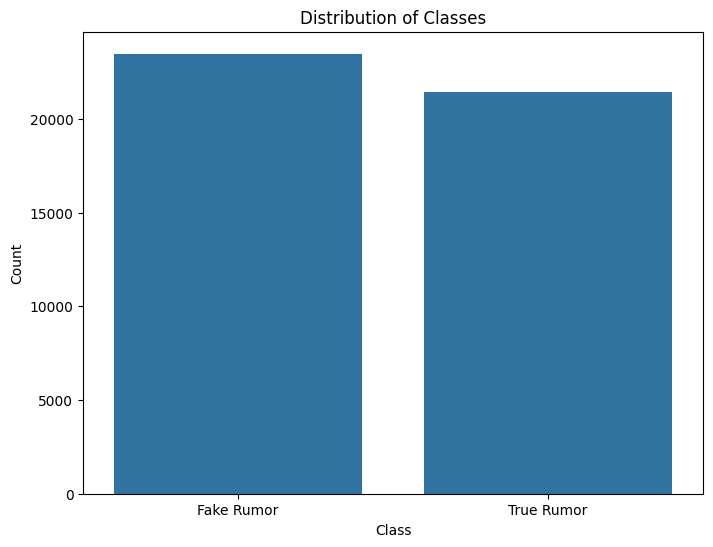

In [11]:
# Plotting the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=merging)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake Rumor', 'True Rumor'])
plt.show()

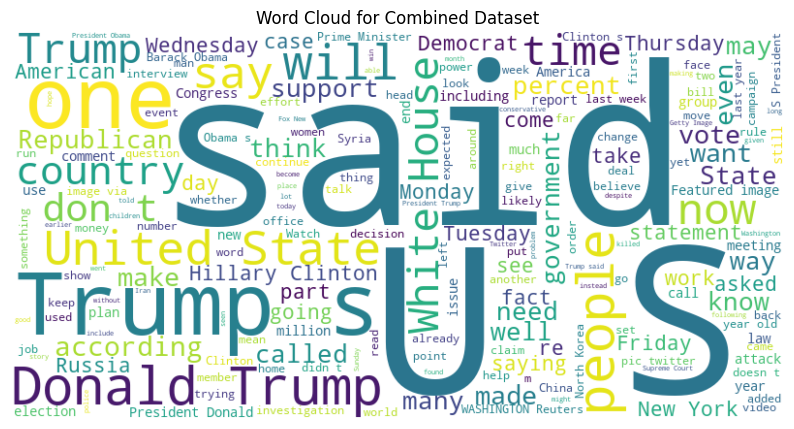

In [12]:
# Generate word cloud for the combined dataset
from wordcloud import WordCloud

text_combined = ' '.join(merging['text'])
wordcloud_combined = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plot word cloud for the combined dataset
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_combined, interpolation='bilinear')
plt.title('Word Cloud for Combined Dataset')
plt.axis('off')
plt.show()

In [13]:
merging.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [14]:
df = merging.drop(['title','subject','date'], axis = 1)

In [15]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
df = df.sample(frac = 1)

In [17]:
df.head()

,text,class
22229,21st Century Wire says Regardless of what one ...,0
6996,(Reuters) - U.S. Republican President-elect Do...,1
1857,It can easily be said that Donald Trump has ab...,0
12734,JERUSALEM (Reuters) - An Israeli cabinet minis...,1
2040,Arizona Senator John McCain seems to be the lo...,0


In [18]:
df.reset_index(inplace = True)
df.drop(['index'], axis = 1, inplace = True)

In [19]:
df.columns

Index(['text', 'class'], dtype='object')

In [20]:
df.head()

,text,class
0,21st Century Wire says Regardless of what one ...,0
1,(Reuters) - U.S. Republican President-elect Do...,1
2,It can easily be said that Donald Trump has ab...,0
3,JERUSALEM (Reuters) - An Israeli cabinet minis...,1
4,Arizona Senator John McCain seems to be the lo...,0


In [21]:
def clean_word(text):
    
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)

    return text

In [22]:
df['text'] = df['text'].apply(clean_word)

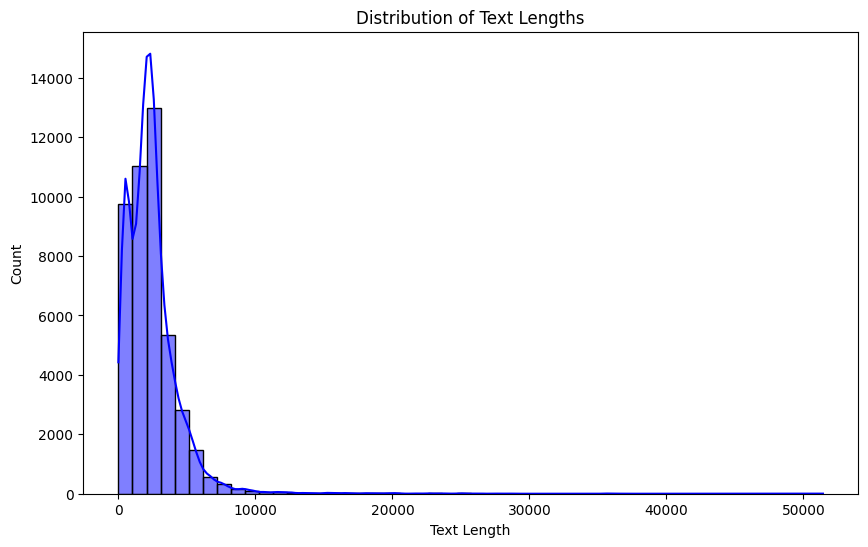

In [23]:
# Plotting the distribution of text lengths
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

C:\Users\Ajay\AppData\Local\Temp\ipykernel_15508\3865574397.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_word_freq_combined, palette='viridis')


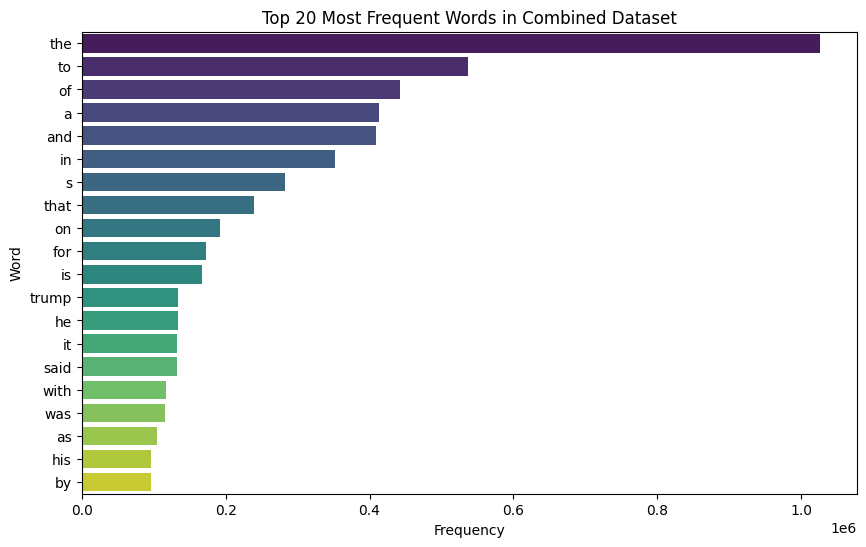

In [24]:
# Plotting the most frequent words for the combined dataset
from collections import Counter
words_combined = ' '.join(df['text']).split()
word_freq_combined = Counter(words_combined)

# Convert to DataFrame for easier plotting
df_word_freq_combined = pd.DataFrame(word_freq_combined.most_common(20), columns=['Word', 'Frequency'])

# Plot frequency plot for the combined dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=df_word_freq_combined, palette='viridis')
plt.title('Top 20 Most Frequent Words in Combined Dataset')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

In [25]:
X = df['text']
Y = df['class']

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25)

In [27]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((33673,), (11225,), (33673,), (11225,))

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=300, random_state=42)
RF.fit(xv_train, Y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [31]:
pred_rf = RF.predict(xv_test)

In [32]:
RF.score(xv_test, Y_test)

0.9900222717149221

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(Y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5968
           1       0.99      0.99      0.99      5257

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [45]:
def output_lable(n):
    if n == 0:
        return "Fake Rumor"
    elif n == 1:
        return "True Rumor"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(clean_word)
    new_x_test = new_def_test['text']
    new_xv_test = vectorization.transform(new_x_test)
    pred_RF = RF.predict(new_xv_test)

    
    return print("\nRF Prediction: {}".format(output_lable(pred_RF[0])))

In [37]:
news = str(input())
manual_testing(news)

Terror Attacks In the hours after six people were killed and 50 injured in a terror attack in London, UK, on 22 March, a photograph was widely circulated of a woman wearing a hijab and talking on the phone on Westminster Bridge, the site of the attack.  Thousands shared the picture claiming the woman, as a Muslim, was indifferent to the suffering of victims around her. #BanIslam was one hashtag circulating with the image.  REX/Shutterstock An account identified as a Russian bot shared this picture of a women wearing a hijab after the Westminster terror attack in March, claiming that as a Muslim, she was indifferent to the suffering of victims around her.REX/Shutterstock The woman in the picture released a statement and spoke of being "devastated by witnessing the aftermath of a shocking and numbing terror attack," after the negative attention she received.   The account, @SouthLoneStar, which first tweeted the image, was suspended by Twitter in November after being identified as a Russ

## Saving the Model

In [38]:
import pickle

In [39]:
filename = 'Rumor_Mill1.sav'
pickle.dump(RF, open(filename, 'wb'))

In [40]:
filename2 = 'Vector.sav'
pickle.dump(vectorization, open(filename2, 'wb'))

## Loading the Saved Model

In [41]:
loaded_vectorization = pickle.load(open('Vector.sav', 'rb'))

In [42]:
loaded_model = pickle.load(open('Rumor_Mill1.sav', 'rb'))

In [44]:
def output_lable(n):
    if n == 0:
        return "Fake Rumor"
    elif n == 1:
        return "True Rumor"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test['text'] = new_def_test['text'].apply(clean_word)
    new_x_test = new_def_test['text']
    new_xv_test = loaded_vectorization.transform(new_x_test)
    pred_RF = loaded_model.predict(new_xv_test)

    
    return print("\nPrediction: {}".format(output_lable(pred_RF[0])))

news = str(input())
manual_testing(news)

The general election is the largest democratic exercise ever - almost one in eight people in the world can vote. On 19 April, Indians will begin choosing a new parliament for the next five years, as Prime Minister Narendra Modi seeks a third consecutive term. Opinion polls put his Bharatiya Janata Party (BJP) and its allies ahead. They are up against the Indian National Developmental Inclusive Alliance (India), which groups more than two dozen opposition parties including Congress, which was dominant for decades until the BJP took office in 2014.  Scroll down to find out all about the staggering scale of the exercise, the powerful personalities and issues on which the election will be fought.  A poster of India's Prime Minister Narendra Modi outside the Bhartiya Janata Party (BJP) headquarters in Mumbai, India on 23 May 2019 Prime Minister Modi is aiming for a third consecutive term in power  The election to the lower house (Lok Sabha) is taking place in a bitter atmosphere. The opposi